In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/dataset'

/content/drive/MyDrive/dataset


In [ ]:
pwd

'/content/drive/MyDrive/dataset'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
train = pd.read_csv('./stars_train.csv',index_col = 0)
test = pd.read_csv('./stars_test.csv', index_col = 0)

In [ ]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


          type        fiberID  ...     modelMag_i     modelMag_z
count   199991  199991.000000  ...  199991.000000  199991.000000
unique      19            NaN  ...            NaN            NaN
top        QSO            NaN  ...            NaN            NaN
freq     49680            NaN  ...            NaN            NaN
mean       NaN     360.830152  ...      17.692395      17.189281
std        NaN     225.305890  ...     131.183416     133.685138
min        NaN       1.000000  ...  -38969.416822  -26050.710196
25%        NaN     174.000000  ...      16.977671      16.705774
50%        NaN     349.000000  ...      18.641756      18.100997
75%        NaN     526.000000  ...      19.968846      19.819554
max        NaN    1000.000000  ...    4062.499371    7420.534172

[11 rows x 22 columns]


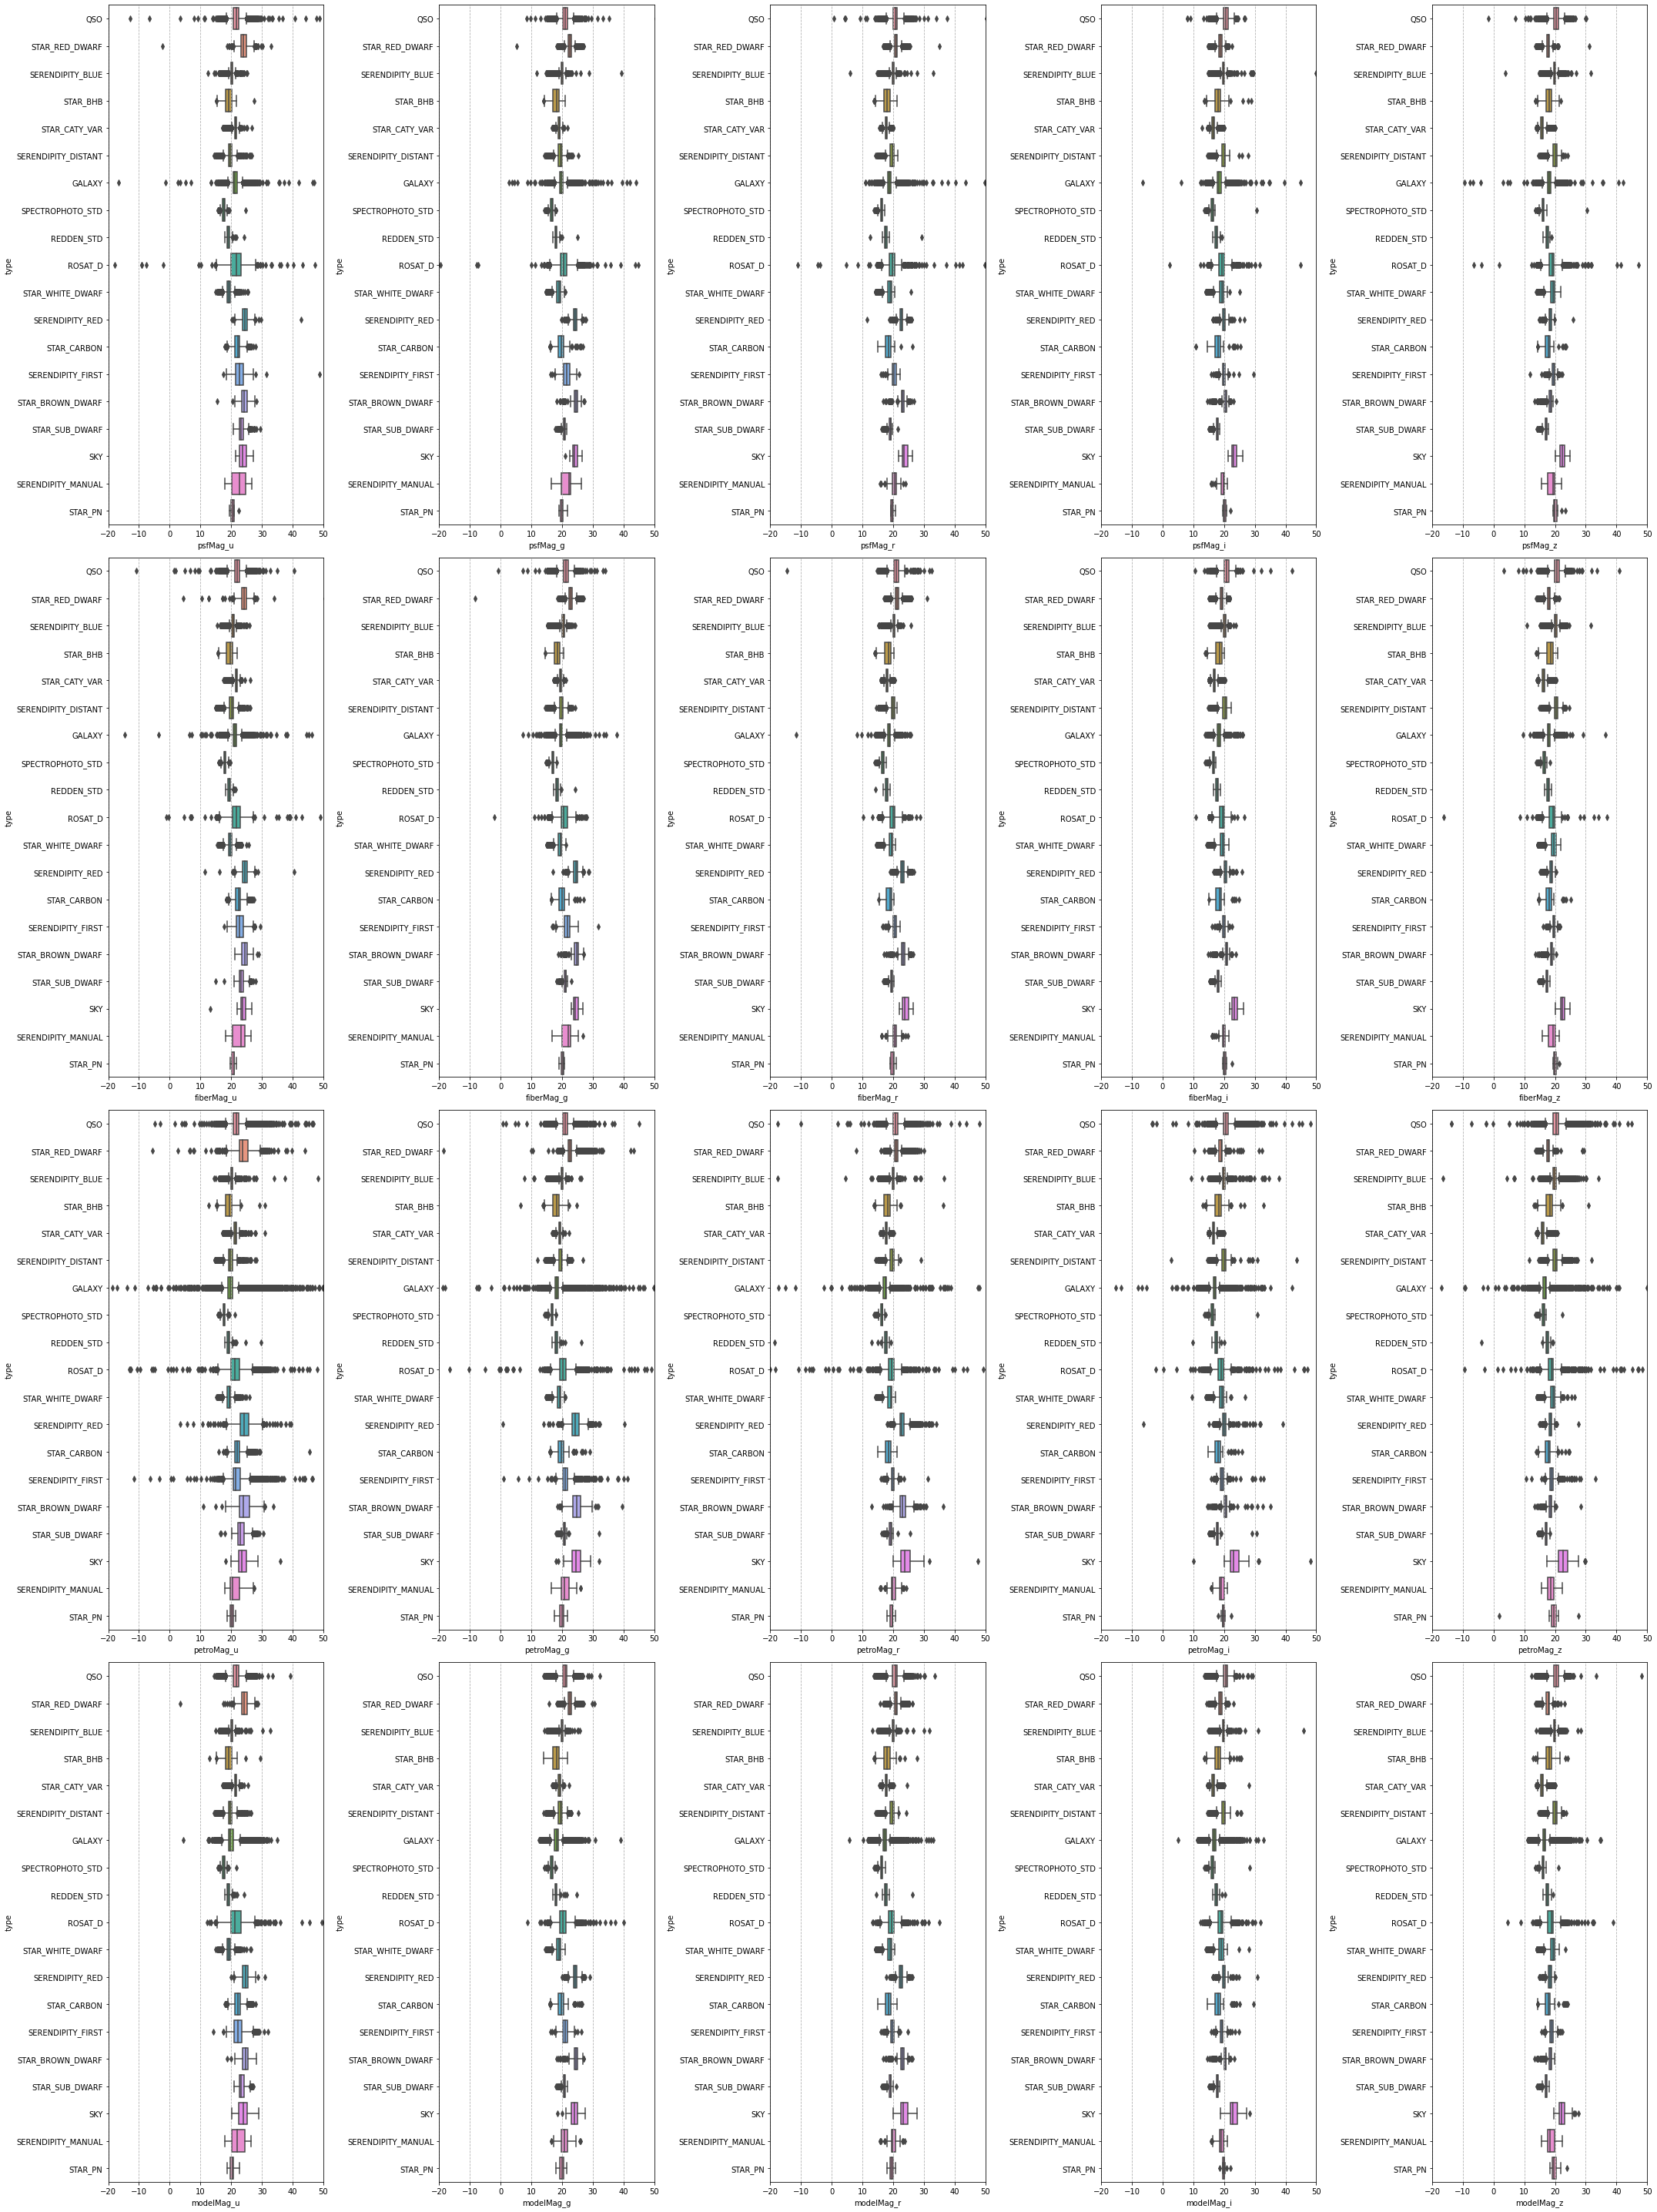

In [ ]:
train.columns
print(train.describe(include='all'))

fig, axes = plt.subplots(4, 5, figsize=(30,40))
columns = train.filter(regex='Mag').columns.tolist()[:]
for i, column in enumerate(columns):
    sns.boxplot(y='type', x=column, data=train, ax=axes.flat[i])
    axes.flat[i].grid(axis='x', linestyle='--')
    axes.flat[i].set_xlim([-20,50])
    
fig.tight_layout()
plt.show()



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 0 to 199990
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   type        199991 non-null  object 
 1   fiberID     199991 non-null  int64  
 2   psfMag_u    199991 non-null  float64
 3   psfMag_g    199991 non-null  float64
 4   psfMag_r    199991 non-null  float64
 5   psfMag_i    199991 non-null  float64
 6   psfMag_z    199991 non-null  float64
 7   fiberMag_u  199991 non-null  float64
 8   fiberMag_g  199991 non-null  float64
 9   fiberMag_r  199991 non-null  float64
 10  fiberMag_i  199991 non-null  float64
 11  fiberMag_z  199991 non-null  float64
 12  petroMag_u  199991 non-null  float64
 13  petroMag_g  199991 non-null  float64
 14  petroMag_r  199991 non-null  float64
 15  petroMag_i  199991 non-null  float64
 16  petroMag_z  199991 non-null  float64
 17  modelMag_u  199991 non-null  float64
 18  modelMag_g  199991 non-null  float64
 19  mo

In [ ]:
train['type'].value_counts()

QSO                    49680
GALAXY                 37347
SERENDIPITY_BLUE       21760
SPECTROPHOTO_STD       14630
REDDEN_STD             14618
STAR_RED_DWARF         13750
STAR_BHB               13500
SERENDIPITY_FIRST       7132
ROSAT_D                 6580
STAR_CATY_VAR           6506
SERENDIPITY_DISTANT     4654
STAR_CARBON             3257
SERENDIPITY_RED         2562
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
Name: type, dtype: int64

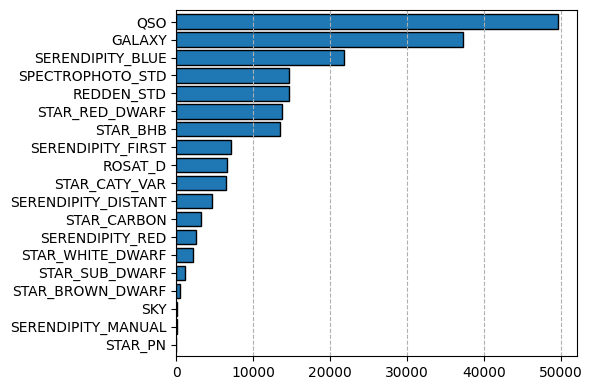

In [ ]:
fig, ax = plt.subplots(dpi=100)
train['type'].value_counts(ascending=True).plot(kind='barh', width=0.8, edgecolor='black', ax=ax)
ax.grid(axis='x', linestyle='--')
fig.tight_layout()
plt.show()

In [ ]:
num = train['type'].value_counts()


In [ ]:
train_corr = train.corr()
train_corr

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
fiberID,1.000000,0.002673,0.003424,0.001901,0.004731,0.004108,0.002785,0.000951,0.004014,0.004143,0.004074,-0.000519,0.003111,0.002913,0.004261,0.001998,0.002441,0.003299,0.003050,0.005851,0.004217
psfMag_u,0.002673,1.000000,0.007163,0.008022,0.008373,0.007613,0.999612,0.001737,0.005493,0.007417,0.005179,-0.844577,0.006210,0.007035,0.005979,0.006911,0.005475,0.005218,0.006855,0.006553,0.009054
psfMag_g,0.003424,0.007163,1.000000,0.656575,0.675570,0.529464,0.018975,0.147544,0.246507,0.479143,0.376652,0.132693,0.611664,0.139764,0.489554,0.458087,0.211310,0.485867,0.637270,0.424497,0.624421
psfMag_r,0.001901,0.008022,0.656575,1.000000,0.537715,0.451904,0.013608,0.120586,0.350773,0.498966,0.378253,0.118255,0.535407,0.487657,0.449181,0.677228,0.450860,0.550238,0.516004,0.590266,0.538881
psfMag_i,0.004731,0.008373,0.675570,0.537715,1.000000,0.648709,0.018252,0.134389,0.352580,0.505415,0.385155,0.110858,0.682430,0.471127,0.523036,0.363586,0.557699,0.452765,0.523340,0.581413,0.640439
psfMag_z,0.004108,0.007613,0.529464,0.451904,0.648709,1.000000,0.018465,0.121613,0.302411,0.557741,0.535643,0.141354,0.586643,0.552653,0.657507,0.419934,0.311835,0.448141,0.347738,0.658930,0.628597
fiberMag_u,0.002785,0.999612,0.018975,0.013608,0.018252,0.018465,1.000000,0.003690,0.002805,0.016168,0.013710,-0.841471,0.017214,0.012957,0.015468,0.007720,0.013842,0.014747,0.020647,0.007937,0.018597
fiberMag_g,0.000951,0.001737,0.147544,0.120586,0.134389,0.121613,0.003690,1.000000,0.063919,0.119069,0.062515,0.028254,0.109501,0.066799,0.109731,0.099121,0.101207,0.112340,0.090383,0.099054,0.139623
fiberMag_r,0.004014,0.005493,0.246507,0.350773,0.352580,0.302411,0.002805,0.063919,1.000000,0.492312,0.340019,0.086974,0.426770,0.171021,0.225000,0.012828,0.333907,0.411668,0.273085,0.485412,0.330141
fiberMag_i,0.004143,0.007417,0.479143,0.498966,0.505415,0.557741,0.016168,0.119069,0.492312,1.000000,0.507972,0.101201,0.552945,0.438867,0.521864,0.124149,0.435159,0.469454,0.585379,0.432930,0.604043


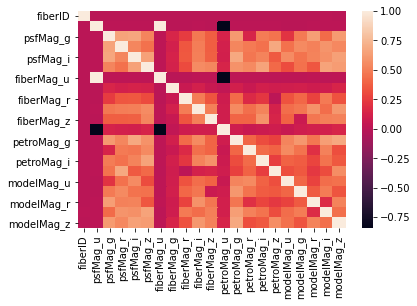

In [ ]:
sns.heatmap(train_corr)

In [ ]:
sample_submission = pd.read_csv('./stars_sample_submission.csv', index_col=0)

In [ ]:
sample_submission.columns

Index(['STAR_WHITE_DWARF', 'STAR_CATY_VAR', 'STAR_BROWN_DWARF',
       'SERENDIPITY_RED', 'REDDEN_STD', 'STAR_BHB', 'GALAXY',
       'SERENDIPITY_DISTANT', 'QSO', 'SKY', 'STAR_RED_DWARF', 'ROSAT_D',
       'STAR_PN', 'SERENDIPITY_FIRST', 'STAR_CARBON', 'SPECTROPHOTO_STD',
       'STAR_SUB_DWARF', 'SERENDIPITY_MANUAL', 'SERENDIPITY_BLUE'],
      dtype='object')

In [ ]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i

print(column_number)

def to_number(x, dic):
  return dic[x]

{'STAR_WHITE_DWARF': 0, 'STAR_CATY_VAR': 1, 'STAR_BROWN_DWARF': 2, 'SERENDIPITY_RED': 3, 'REDDEN_STD': 4, 'STAR_BHB': 5, 'GALAXY': 6, 'SERENDIPITY_DISTANT': 7, 'QSO': 8, 'SKY': 9, 'STAR_RED_DWARF': 10, 'ROSAT_D': 11, 'STAR_PN': 12, 'SERENDIPITY_FIRST': 13, 'STAR_CARBON': 14, 'SPECTROPHOTO_STD': 15, 'STAR_SUB_DWARF': 16, 'SERENDIPITY_MANUAL': 17, 'SERENDIPITY_BLUE': 18}


In [ ]:
train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))


In [ ]:
train['type_num']

id
0          8
1          8
2          8
3          8
4         10
          ..
199986     8
199987     6
199988    10
199989     6
199990     8
Name: type_num, Length: 199991, dtype: int64

In [ ]:
train_x = train.drop(['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, \
                                                  test_size=0.2, random_state=621, stratify = train_y)

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=100, n_jobs=-1, random_state=621)
xgb_clf.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)])

[0]	validation_0-merror:0.252744	validation_1-merror:0.250031
[1]	validation_0-merror:0.231318	validation_1-merror:0.229431
[2]	validation_0-merror:0.229505	validation_1-merror:0.227456
[3]	validation_0-merror:0.229124	validation_1-merror:0.227156
[4]	validation_0-merror:0.224824	validation_1-merror:0.223806
[5]	validation_0-merror:0.224311	validation_1-merror:0.222631
[6]	validation_0-merror:0.222136	validation_1-merror:0.220756
[7]	validation_0-merror:0.220555	validation_1-merror:0.219005
[8]	validation_0-merror:0.219798	validation_1-merror:0.218705
[9]	validation_0-merror:0.218592	validation_1-merror:0.217605
[10]	validation_0-merror:0.216223	validation_1-merror:0.215355
[11]	validation_0-merror:0.215623	validation_1-merror:0.21503
[12]	validation_0-merror:0.214967	validation_1-merror:0.214455
[13]	validation_0-merror:0.213623	validation_1-merror:0.213305
[14]	validation_0-merror:0.212467	validation_1-merror:0.21233
[15]	validation_0-merror:0.211804	validation_1-merror:0.21158
[16]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=621,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_pred = xgb_clf.predict_proba(test_x.drop('fiberID',axis=1))

In [ ]:
xgb_pred

array([[8.5981446e-05, 7.9276026e-05, 1.0537400e-03, ..., 7.6958659e-04,
        8.7728509e-04, 2.1375275e-04],
       [5.1425095e-04, 5.3055404e-04, 4.6897822e-04, ..., 4.7077582e-04,
        6.0419133e-04, 2.0312094e-03],
       [1.4140527e-03, 5.2565895e-04, 4.2923391e-05, ..., 1.6008866e-04,
        5.4341039e-05, 1.5704168e-04],
       ...,
       [1.0439997e-03, 6.0085679e-04, 2.6193337e-04, ..., 2.3625160e-04,
        3.9656207e-04, 1.5803471e-01],
       [5.6839301e-05, 4.9301620e-05, 6.0810791e-05, ..., 5.2017698e-05,
        7.7276680e-05, 2.3227930e-03],
       [3.4365621e-03, 1.7396931e-04, 1.4421187e-04, ..., 2.2701522e-04,
        1.5118263e-04, 2.5858625e-03]], dtype=float32)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=100, n_jobs=-1, random_state=621)
lgbm_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)])

[1]	training's multi_logloss: 1.89109	valid_1's multi_logloss: 1.89863
[2]	training's multi_logloss: 1.68199	valid_1's multi_logloss: 1.70311
[3]	training's multi_logloss: 1.52564	valid_1's multi_logloss: 1.55183
[4]	training's multi_logloss: 1.40817	valid_1's multi_logloss: 1.44445
[5]	training's multi_logloss: 1.30145	valid_1's multi_logloss: 1.34734
[6]	training's multi_logloss: 1.21758	valid_1's multi_logloss: 1.26524
[7]	training's multi_logloss: 1.14576	valid_1's multi_logloss: 1.2153
[8]	training's multi_logloss: 1.06851	valid_1's multi_logloss: 1.13883
[9]	training's multi_logloss: 1.00169	valid_1's multi_logloss: 1.06922
[10]	training's multi_logloss: 0.945334	valid_1's multi_logloss: 1.01522
[11]	training's multi_logloss: 0.926716	valid_1's multi_logloss: 1.01532
[12]	training's multi_logloss: 0.854798	valid_1's multi_logloss: 0.938367
[13]	training's multi_logloss: 0.841389	valid_1's multi_logloss: 0.934193
[14]	training's multi_logloss: 0.805115	valid_1's multi_logloss: 0.8

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=621, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbm_pred = lgbm_clf.predict_proba(test_x.drop('fiberID', axis = 1))

In [ ]:
lgbm_pred[0]

array([5.67265838e-05, 1.02430781e-04, 1.10977501e-04, 2.63999454e-02,
       1.25813361e-04, 3.38472324e-04, 2.93814962e-03, 1.30608218e-04,
       9.44641097e-03, 0.00000000e+00, 9.55272227e-01, 4.37512051e-03,
       0.00000000e+00, 2.89391633e-05, 6.84315661e-05, 2.95898958e-04,
       1.44028701e-06, 0.00000000e+00, 3.08407835e-04])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

In [ ]:
y_pred = decision_tree.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.32      0.32       432
           1       0.92      0.94      0.93      1301
           2       0.46      0.37      0.41       100
           3       0.73      0.75      0.74       512
           4       0.90      0.89      0.89      2924
           5       0.80      0.79      0.80      2700
           6       0.96      0.95      0.95      7470
           7       0.41      0.42      0.41       931
           8       0.85      0.85      0.85      9936
           9       0.81      0.88      0.85        25
          10       0.96      0.96      0.96      2750
          11       0.27      0.31      0.29      1316
          12       0.00      0.00      0.00         3
          13       0.52      0.54      0.53      1427
          14       0.83      0.83      0.83       651
          15       0.94      0.93      0.94      2926
          16       0.89      0.86      0.87       231
          17       0.27    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
decision_tree2 = DecisionTreeClassifier(random_state=32)
decision_tree2.fit(X_train.drop('fiberID',axis = 1),y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

In [ ]:
y_pred2 = decision_tree2.predict(X_valid.drop('fiberID',axis=1))
print(classification_report(y_valid, y_pred2))

              precision    recall  f1-score   support

           0       0.34      0.36      0.35       432
           1       0.91      0.94      0.92      1301
           2       0.39      0.39      0.39       100
           3       0.72      0.73      0.73       512
           4       0.90      0.88      0.89      2924
           5       0.79      0.78      0.79      2700
           6       0.96      0.95      0.96      7470
           7       0.42      0.43      0.42       931
           8       0.82      0.82      0.82      9936
           9       0.89      0.96      0.92        25
          10       0.96      0.95      0.95      2750
          11       0.27      0.28      0.28      1316
          12       0.25      0.33      0.29         3
          13       0.51      0.52      0.52      1427
          14       0.82      0.82      0.82       651
          15       0.94      0.93      0.93      2926
          16       0.88      0.89      0.89       231
          17       0.43    

In [ ]:
for i in column_number:
  print(f'{i}({column_number[i]}): {num[i]}')

STAR_WHITE_DWARF(0): 2160
STAR_CATY_VAR(1): 6506
STAR_BROWN_DWARF(2): 500
SERENDIPITY_RED(3): 2562
REDDEN_STD(4): 14618
STAR_BHB(5): 13500
GALAXY(6): 37347
SERENDIPITY_DISTANT(7): 4654
QSO(8): 49680
SKY(9): 127
STAR_RED_DWARF(10): 13750
ROSAT_D(11): 6580
STAR_PN(12): 13
SERENDIPITY_FIRST(13): 7132
STAR_CARBON(14): 3257
SPECTROPHOTO_STD(15): 14630
STAR_SUB_DWARF(16): 1154
SERENDIPITY_MANUAL(17): 61
SERENDIPITY_BLUE(18): 21760
